# Part 0 : Data Download and Preparation of the output

### Create a dictionnary of the data_path of the lab files

In [1]:
# Example for plotting a spectrogram using this function
import audiosegment
import matplotlib.pyplot as plt
import numpy as np
from os import walk

from os import walk
mypath = "./chord_file"
dict_path = dict()
for (dirpath, dirnames, filenames) in walk(mypath):
    dict_path[dirpath] = filenames
dict_path.keys()

dict_keys(['./chord_file', './chord_file\\Abbey_Road', "./chord_file\\A_Hard_Day's_Night", './chord_file\\Beatles_for_Sale', './chord_file\\Carole_King', './chord_file\\Greatest_Hits_I', './chord_file\\Greatest_Hits_II', './chord_file\\Help', './chord_file\\Let_It_Be', './chord_file\\Magical_Mystery_Tour', './chord_file\\Please_Please_Me', './chord_file\\Revolver', './chord_file\\Rubber_Soul', './chord_file\\Sgt_Pepper', './chord_file\\The_Beatles_1', './chord_file\\The_Beatles_2', './chord_file\\With_The_Beatles', './chord_file\\Zwielicht'])

### Create a dictionnary of the content of the file in the previous dictionnary

In [2]:
dict_file_lab = dict()
for ele,keys in dict_path.items():
    print(ele)
    for data_path in keys:
        print(ele+ "/" + data_path)

./chord_file
./chord_file\Abbey_Road
./chord_file\Abbey_Road/01_-_come_together.lab
./chord_file\Abbey_Road/02_-_something.lab
./chord_file\Abbey_Road/03_-_maxwell's_silver_hammer.lab
./chord_file\Abbey_Road/04_-_oh!_darling.lab
./chord_file\Abbey_Road/05_-_octopus's_garden.lab
./chord_file\Abbey_Road/06_-_i_want_you.lab
./chord_file\Abbey_Road/07_-_here_comes_the_sun.lab
./chord_file\Abbey_Road/08_-_because.lab
./chord_file\Abbey_Road/09_-_you_never_give_me_your_money.lab
./chord_file\Abbey_Road/10_-_sun_king.lab
./chord_file\Abbey_Road/11_-_mean_mr_mustard.lab
./chord_file\Abbey_Road/12_-_polythene_pam.lab
./chord_file\Abbey_Road/13_-_she_came_in_through_the_bathroom_window.lab
./chord_file\Abbey_Road/14_-_golden_slumbers.lab
./chord_file\Abbey_Road/15_-_carry_that_weight.lab
./chord_file\Abbey_Road/16_-_the_end.lab
./chord_file\Abbey_Road/17_-_her_majesty.lab
./chord_file\A_Hard_Day's_Night
./chord_file\A_Hard_Day's_Night/01_-_a_hard_day's_night.lab
./chord_file\A_Hard_Day's_Night/0

In [3]:
dict_file_lab = dict()

dict_num_chords = dict()
for ele,keys in dict_path.items():
    #print(ele)
    for data_path in keys:
        file_path = ele+ "/" + data_path
        #print(file_path)
        with open(file_path) as file: 
            data = file.read() 
            #print(data)
            data_tab = data.replace('\t',' ').split("\n")
            data_clean_string = [ele.split(" ") for ele in data_tab]
            data_clean_string = data_clean_string[:-1]
            data_clean_float = []
            for element in data_clean_string:
                #print(element)
                assert len(element)==3,'la longueur de ele doit être 3'
                #print(element)
                element[0] = float(element[0])
                element[1] = float(element[1])
                data_clean_float.append(element)
                
                if(element[2] not in dict_num_chords.keys()):
                    dict_num_chords[element[2]]=1
                else:
                    dict_num_chords[element[2]]+=1
                #print(ele)
                
            #print(data_clean_float)
            dict_file_lab[file_path] = data_clean_float 

### Analyse des labels

In [4]:
dict_num_chords.values()

dict_values([590, 274, 1819, 197, 354, 1673, 596, 242, 63, 1151, 35, 106, 48, 1540, 3, 115, 506, 4, 86, 162, 9, 311, 34, 2, 14, 1, 1, 39, 4, 1, 5, 16, 529, 422, 20, 6, 94, 15, 10, 10, 33, 114, 206, 5, 5, 149, 6, 10, 6, 41, 1, 9, 17, 1107, 104, 78, 23, 45, 5, 186, 9, 15, 22, 28, 22, 21, 35, 24, 4, 7, 400, 4, 4, 4, 22, 17, 37, 6, 8, 68, 2, 147, 5, 44, 9, 1, 5, 4, 193, 7, 5, 8, 8, 51, 12, 43, 235, 20, 64, 6, 102, 1, 1, 24, 57, 75, 16, 6, 2, 10, 2, 1, 2, 43, 1, 1, 6, 37, 1, 37, 1, 1, 10, 1, 1, 1, 21, 70, 17, 130, 81, 14, 171, 15, 68, 6, 33, 1, 13, 16, 16, 18, 2, 16, 1, 200, 52, 10, 4, 17, 2, 14, 1, 32, 30, 1, 23, 1, 14, 30, 7, 3, 51, 2, 1, 8, 5, 13, 55, 7, 45, 1, 1, 7, 16, 1, 1, 1, 25, 41, 41, 7, 32, 2, 1, 16, 1, 1, 2, 48, 2, 2, 229, 2, 20, 2, 1, 1, 1, 43, 21, 1, 4, 1, 8, 11, 10, 3, 2, 1, 2, 9, 10, 3, 8, 2, 8, 2, 1, 1, 13, 3, 16, 49, 8, 2, 12, 9, 1, 2, 2, 7, 1, 4, 53, 40, 13, 47, 11, 37, 18, 13, 4, 6, 4, 34, 61, 6, 1, 33, 19, 1, 39, 3, 8, 10, 10, 1, 103, 2, 2, 1, 6, 1, 1, 89, 73, 2, 9, 7, 

On remarque qu'il y a beaucoup de label qui apparaissent qu'une seule fois. Cela est un problème a investiguer

In [5]:
dict_num_chords.keys()

dict_keys(['N', 'D:min', 'A', 'G:7', 'B:min', 'G', 'F', 'Eb', 'G/5', 'C', 'E:min/5', 'C:7', 'C/3', 'D', 'G:sus4(2)/2', 'G/3', 'A:min', 'Ab:aug', 'C/5', 'D:7', 'C#:min/5', 'F#:min', 'A/5', 'A/7', 'A/b7', 'A/6', 'A/b6', 'C/7', 'C/6', 'C/2', 'G:sus4(2)', 'F#:min/5', 'B', 'E:min', 'E:min/b7', 'E:min/6', 'A/3', 'D/7', 'D/6', 'A/2', 'B/5', 'E:7', 'D/5', 'D:maj(*1)/#1', 'E:7/5', 'A:7', 'A:7/5', 'F#/5', 'D:7/5', 'G/2', 'G/#4', 'A:7/3', 'E:aug', 'E', 'F:7', 'Bb:7', 'B:9', 'E/5', 'D#', 'C#:min', 'E/7', 'C#:min/b7', 'D:min/2', 'D:min/b3', 'D:min/4', 'D:min/5', 'E:9', 'A:aug', 'D:min7(2,*b3,4)', 'G#:aug', 'Bb', 'D:(1,4)', 'D#:(1,4)', 'E:(1,4)', 'C:(1)', 'B:(1)', 'D:maj6', 'A:maj(9)/3', 'E:sus4(b7)', 'D/3', 'E:sus4', 'A:min7', 'D#:hdim7', 'G#', 'A:9', 'A:7(*5,13)', 'D:dim', 'A:7(13)', 'F#', 'G#:7', 'D:dim7', 'D:min9', 'C:sus4', 'F:maj7', 'B:dim', 'Gb', 'Ab', 'E:maj6', 'F#:min7', 'B:maj6', 'G:min7', 'G#:min7/b3', 'G:9(*3,11)', 'C:maj7', 'E:min7', 'C#', 'D/2', 'E/b7', 'E/6', 'D:min/b7', 'D:min/6', 'C

on remarque qu'il y a des parenthèses sur certains accords ce qui complexifies les labels. On peut les ignorer pour envie de simplicité. 

In [6]:
import re
dict_file_lab_simplified = dict()

dict_num_chords_simplified = dict()

for ele,keys in dict_path.items():
    #print(ele)
    for data_path in keys:
        file_path = ele+ "/" + data_path
        #print(file_path)
        with open(file_path) as file: 
            data = file.read() 
            #print(data)
            data_tab = data.replace('\t',' ').replace('*','').split("\n")
            data_clean_string = [ele.split(" ") for ele in data_tab]
            data_clean_string = data_clean_string[:-1]
            data_clean_float = []
            for element in data_clean_string:
                #print(element)
                assert len(element)==3,'la longueur de ele doit être 3'
                #print(element)
                element[0] = float(element[0])
                element[1] = float(element[1])
                data_clean_float.append(element)
                
                try:
                    index_start_parenthesis = element[2].index('(')
                    element[2] = element[2][:index_start_parenthesis]
                except:
                    0
                
                try:
                    index_start_slash = element[2].index('/')
                    element[2] = element[2][:index_start_slash]
                except:
                    0
                
                if(element[2][-1] == ":"):
                    element[2] = element[2][-1]
                
                

                #prin()
                
                if(element[2] not in dict_num_chords_simplified.keys()):
                    dict_num_chords_simplified[element[2]]=1
                else:
                    dict_num_chords_simplified[element[2]]+=1
                #print(ele)
                
            #print(data_clean_float)
            dict_file_lab_simplified[file_path] = data_clean_float 
            

In [7]:
dict_file_lab_simplified.values()

dict_values([[[0.0, 1.172266, 'N'], [1.172266, 12.585238, 'D:min'], [12.585238, 24.369365, 'D:min'], [24.369365, 30.209183, 'A'], [30.209183, 34.603995, 'G:7'], [34.603995, 36.037392, 'N'], [36.037392, 47.41517, 'D:min'], [47.41517, 59.141247, 'D:min'], [59.141247, 64.969455, 'A'], [64.969455, 70.712128, 'G:7'], [70.712128, 72.9339, 'B:min'], [72.9339, 73.618888, 'A'], [73.618888, 75.058526, 'G'], [75.058526, 76.521383, 'A'], [76.521383, 87.92238, 'D:min'], [87.92238, 99.567188, 'D:min'], [99.567188, 105.418616, 'A'], [105.418616, 111.258435, 'G:7'], [111.258435, 113.406281, 'B:min'], [113.406281, 114.114489, 'A'], [114.114489, 115.577346, 'G'], [115.577346, 117.075034, 'A'], [117.075034, 122.636213, 'D:min'], [122.636213, 134.22297, 'D:min'], [134.22297, 145.751678, 'A'], [145.751678, 151.521836, 'D:min'], [151.521836, 163.317573, 'D:min'], [163.317573, 169.180612, 'A'], [169.180612, 175.02043, 'G:7'], [175.02043, 177.179886, 'B:min'], [177.179886, 177.922925, 'A'], [177.922925, 179.3

Text(0, 0.5, "nombre d'accord")

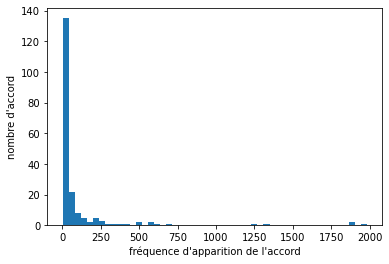

In [8]:
plt.hist(dict_num_chords_simplified.values(),bins=50)
plt.xlabel("fréquence d'apparition de l'accord")
plt.ylabel("nombre d'accord")
#plt.title("Présentation du nombre d'accord en fonction de leur nombre d'apparition dans nos données")

In [9]:
dict_num_chords_simplified.keys()

dict_keys(['N', 'D:min', 'A', 'G:7', 'B:min', 'G', 'F', 'Eb', 'C', 'E:min', 'C:7', 'D', 'G:sus4', 'A:min', 'Ab:aug', 'D:7', 'C#:min', 'F#:min', 'B', 'E:7', 'D:maj', 'A:7', 'F#', 'E:aug', 'E', 'F:7', 'Bb:7', 'B:9', 'D#', 'E:9', 'A:aug', 'D:min7', 'G#:aug', 'Bb', ':', 'D:maj6', 'A:maj', 'E:sus4', 'A:min7', 'D#:hdim7', 'G#', 'A:9', 'D:dim', 'G#:7', 'D:dim7', 'D:min9', 'C:sus4', 'F:maj7', 'B:dim', 'Gb', 'Ab', 'E:maj6', 'F#:min7', 'B:maj6', 'G:min7', 'G#:min7', 'G:9', 'C:maj7', 'E:min7', 'C#', 'D#:dim', 'C:maj6', 'B:sus2', 'E:dim', 'F:maj9', 'B:7', 'Eb:min', 'Db', 'Bb:min', 'F:dim', 'G:min', 'D:9', 'G#:min', 'B:aug', 'A:sus4', 'C:9', 'C:maj9', 'F:min', 'F#:sus4', 'D#:min', 'D#:7', 'C#:7', 'G:maj6', 'D:sus4', 'C:min7', 'C:min9', 'Eb:maj7', 'Ab:maj7', 'F:min7', 'F:6', 'F:9', 'Bb:maj7', 'D:maj9', 'G:maj7', 'D:6', 'G:6', 'D:maj7', 'A:6', 'E:sus', 'E:7sus', 'B:min7', 'B:7sus', 'C:min', 'Eb:7', 'E:4', 'Bb:dim', 'F#:dim', 'Db:6', 'Eb:9', 'G:dim', 'F#:7', 'A:min6', 'F#min7', 'C#:min7', 'Bb:min7', '

In [10]:
for ele in dict_num_chords_simplified.keys():
    
    ele = ele.replace(':','')
    ele = ele.replace('min','m')
    ele = ele.replace('maj','')
    
    tab_values = []
    try:
        indice_h = ele.index('h')
    except:
        try:
            indice_dim7 = ele.index('dim7')
            ele = ele.replace('dim7','7')
            c = Chord(ele)
            tab_components = c.components()
            
            for note in tab_components:
                tab_values.append( (note_to_val(note)-1) %12 )
            #print(tab_values)
                
        except:
            try:
                if(ele != "N" and ele !=""):
                    c = Chord(ele)
                    tab_components = c.components()
                    #print(tab_components)
                    
                    for note in tab_components:
                        tab_values.append(note_to_val(note))
                    #print(tab_values)4
                    
            except:
                print(ele)
    
        

Dm
A
G7
Bm
G
F
Eb
C
Em
C7
D
Gsus4
Am
Abaug
D7
C#m
F#m
B
E7
D
A7
F#
Eaug
E
F7
Bb7
B9
D#
E9
Aaug
Dm7
G#aug
Bb
D6
A
Esus4
Am7
G#
A9
Ddim
G#7
D7
Dm9
Csus4
F7
Bdim
Gb
Ab
E6
F#m7
B6
Gm7
G#m7
G9
C7
Em7
C#
D#dim
C6
Bsus2
Edim
F9
B7
Ebm
Db
Bbm
Fdim
Gm
D9
G#m
Baug
Asus4
C9
C9
Fm
F#sus4
D#m
D#7
C#7
G6
Dsus4
Cm7
Cm9
Eb7
Ab7
Fm7
F6
F9
Bb7
D9
G7
D6
G6
D7
A6
Esus
E7sus
Bm7
B7sus
Cm
Eb7
E4
Bbdim
F#dim
Db6
Eb9
Gdim
F#7
Am6
F#m7
C#m7
Bbm7
Ab6
Ab7
Gb7
Db6
Db7
Bb6
Bb
Eb
C#dim
F
Abm
Ab
Ebdim
Db
Adim
E
B
Gb
Bb9
Abdim
C
G
Bbaug
Daug
F#
Bbsus4
Db9
Db7
Gbm
Cb
Gm9
Em9
Ab6
G9
Em6
D#aug
A6
Asus2
F#m9
Gaug
Ebm7
F6
G#7
A7
F#aug
D#7
E7
F#9
A7
Cm6
F#m7
B7
Dbm
Abm7
Fm6
C#7
Eb6
B7
Bsus4
Ebsus4
C#sus4
Faug
Caug
E7
Gm7
Bb7
C7
Bbsus2
Ab9
Ebaug
Am9
F#m6
Esus2
G7
Dbdim
Gb7


## Creating clean outputs

l'idée est de crée un array binaire ayant une valeur 1 à l'indice de l'accord et 0 aux autres indices.
Pour cela il faut ordonnées les accords selon leurs fréquences afin d'avoir une représentation en accord avec les notes jouées.

Avec pychord on peut avoir la composition d'un accord.
On va utiliser cela sur nos accords afin d'avoir la composition de chaque note possible.

In [11]:
from pychord import Chord
from pychord.utils import *

In [12]:
def transform_chord_to_note(chord):
    tab_values = []
    
    chord = chord.replace(':','')
    chord = chord.replace('min','m')
    chord = chord.replace('maj','')
    
    try:
        indice_h = chord.index('h')
        chord = chord.replace('h','')
        c = Chord(chord)
        tab_components = c.components()
        
    except:
        try:
            indice_dim7 = chord.index('dim7')
            chord = chord.replace('dim7','7')
            c = Chord(chord)
            tab_components = c.components()
            
            for note in tab_components:
                tab_values.append( (note_to_val(note)-1) %12 )
                
        except:
            try:
                if(chord != "N" and chord !=""):
                    c = Chord(chord)
                    tab_components = c.components()
                    
                    for note in tab_components:
                        tab_values.append(note_to_val(note))
                        
            except:
                print(chord)
                
    return tab_values    

In [13]:
dic_chord_to_note = dict()

for ele in dict_num_chords_simplified.keys():
        #print('ele : ',ele)
        tab = transform_chord_to_note(ele)
        #print(tab)
        dic_chord_to_note[ele] = tab
        
dic_chord_to_note

E7sus
B7sus


{'N': [],
 'D:min': [2, 5, 9],
 'A': [9, 1, 4],
 'G:7': [7, 11, 2, 5],
 'B:min': [11, 2, 6],
 'G': [7, 11, 2],
 'F': [5, 9, 0],
 'Eb': [3, 7, 10],
 'C': [0, 4, 7],
 'E:min': [4, 7, 11],
 'C:7': [0, 4, 7, 10],
 'D': [2, 6, 9],
 'G:sus4': [7, 0, 2],
 'A:min': [9, 0, 4],
 'Ab:aug': [8, 0, 4],
 'D:7': [2, 6, 9, 0],
 'C#:min': [1, 4, 8],
 'F#:min': [6, 9, 1],
 'B': [11, 3, 6],
 'E:7': [4, 8, 11, 2],
 'D:maj': [2, 6, 9],
 'A:7': [9, 1, 4, 7],
 'F#': [6, 10, 1],
 'E:aug': [4, 8, 0],
 'E': [4, 8, 11],
 'F:7': [5, 9, 0, 3],
 'Bb:7': [10, 2, 5, 8],
 'B:9': [11, 3, 6, 9, 1],
 'D#': [3, 7, 10],
 'E:9': [4, 8, 11, 2, 6],
 'A:aug': [9, 1, 5],
 'D:min7': [2, 5, 9, 0],
 'G#:aug': [8, 0, 4],
 'Bb': [10, 2, 5],
 ':': [],
 'D:maj6': [2, 6, 9, 11],
 'A:maj': [9, 1, 4],
 'E:sus4': [4, 9, 11],
 'A:min7': [9, 0, 4, 7],
 'D#:hdim7': [2, 6, 9, 0],
 'G#': [8, 0, 3],
 'A:9': [9, 1, 4, 7, 11],
 'D:dim': [2, 5, 8],
 'G#:7': [8, 0, 3, 6],
 'D:dim7': [1, 5, 8, 11],
 'D:min9': [2, 5, 9, 0, 4],
 'C:sus4': [0, 5, 7],
 

# Part 0-b : Preparation of the audio file

### Create a dictionnary of a data path of the folder 

In [14]:
mypath = "./sound_file"
dict_sound = dict()
for (dirpath, dirnames, filenames) in walk(mypath):
    dict_sound[dirpath] = filenames
dict_sound.keys()

dict_keys(['./sound_file', './sound_file\\Abbey_Road', "./sound_file\\A_Hard_Day's_Night", './sound_file\\Beatles_for_Sale', './sound_file\\Carole_King', './sound_file\\Greatest_Hits_I', './sound_file\\Greatest_Hits_II', './sound_file\\Help', './sound_file\\Let_It_Be', './sound_file\\Magical_Mystery_Tour', './sound_file\\Please_Please_Me', './sound_file\\Revolver', './sound_file\\Rubber_Soul', './sound_file\\Sgt_Pepper', './sound_file\\The_Beatles_1', './sound_file\\The_Beatles_2', './sound_file\\With_The_Beatles', './sound_file\\Zwielicht'])

### Create a dictionnary of the content of the file ofthe previous dict

In [15]:
dict_file_sound = dict()
for ele,keys in dict_sound.items():
    print(ele)
    for data_path in keys:
        print(ele+ "/" + data_path)

./sound_file
./sound_file\Abbey_Road
./sound_file\Abbey_Road/01 Come Together - Remastered 2009.m4a
./sound_file\Abbey_Road/02 Something - Remastered 2009.m4a
./sound_file\Abbey_Road/03 Maxwell's Silver Hammer - Remastered 2009.m4a
./sound_file\Abbey_Road/04 Oh! Darling - Remastered 2009.m4a
./sound_file\Abbey_Road/05 Octopus's Garden - Remastered 2009.m4a
./sound_file\Abbey_Road/06 I Want You (She's So Heavy) - Remastered 2009.m4a
./sound_file\Abbey_Road/07 Here Comes The Sun - Remastered 2009.m4a
./sound_file\Abbey_Road/08 Because - Remastered 2009.m4a
./sound_file\Abbey_Road/09 You Never Give Me Your Money - Remastered 2009.m4a
./sound_file\Abbey_Road/10 Sun King - Remastered 2009.m4a
./sound_file\Abbey_Road/11 Mean Mr Mustard - Remastered 2009.m4a
./sound_file\Abbey_Road/12 Polythene Pam - Remastered 2009.m4a
./sound_file\Abbey_Road/13 She Came In Through The Bathroom Window - Remastered 2009.m4a
./sound_file\Abbey_Road/14 Golden Slumbers - Remastered 2009.m4a
./sound_file\Abbey_Ro

In [16]:
dict_file_sound = dict()

for ele,keys in dict_sound.items():
    for data_path in keys:
        file_path = ele+ "/" + data_path
        indice_start = 13
        indice_end = file_path[13:].find('/')+3+indice_start
        new_key = file_path[indice_start:indice_end]
        dict_file_sound[new_key] = file_path

In [17]:
#seg = audiosegment.from_file("./sound_file\Abbey_Road/16 The End - Remastered 2009.m4a")

#seg.resample(sample_rate_Hz=32000, channels=1)
#seg.set_frame_rate(88000)

# this is an array
#samples = seg.get_array_of_samples()
#samples = np.array(samples)
#timestep = 1/float(88000)

#times = np.arange(len(samples))*timestep

#print(type(samples))
#plt.plot(times,samples)

In [18]:
## listen the array file : aeiou
# import IPython.display as ipd
# ipd.Audio(samples, rate=44*2*1000 ) 

In [19]:
#sample_float = samples.astype('float64') 
#sample_float.shape[0] / (44*2*1000)

# Part I : Preprocessing 

In [20]:
from sklearn.decomposition import PCA
import librosa, librosa.display
import numpy as np
from scipy import stats

pca = PCA(n_components=10)
sr = 88000

for key,tab_label in dict_file_lab_simplified.items():
    
    indice_start_label = 13
    indice_end_label = key[13:].find('/')+3+indice_start_label
    new_key = key[indice_start_label:indice_end_label]
    
    # get the associated sound file
    file_path_sound = dict_file_sound[new_key]
    
    seg = audiosegment.from_file(file_path_sound)
    seg.set_frame_rate(88000)
    samples = seg.get_array_of_samples()
    samples = np.array(samples).astype('float64') 
    
    C = np.abs(librosa.cqt(samples, sr=sr))
    pca.fit(C.T)    

In [21]:
def construct_tab_label(tab_label,indice_debut_seconde):
    
    tab_label_binary = np.zeros(12)
    list_components = []
    for ele in tab_label:
        if ele[0] < indice_debut_seconde and ele[1] > indice_debut_seconde :
            note = ele[2]
            list_components = dic_chord_to_note[note]
            break
    
    tab_label_binary[list_components] = 1 #/max(1,len(list_components))
    
    return tab_label_binary

In [22]:
def transform_to_frame(file_sound,tab_label,size_frame,pca):
    X_Deep = []
    Y_Deep = []
    dic_chord_to_note
    sr = 88000
    rapport_multiplicatif = sr/512
    
    nombre_per_frame = size_frame*rapport_multiplicatif
    # print(nombre_per_frame)
    
    temps_sec_fin_morceau = min(180,int(tab_label[-1][1]))
    # print(temps_sec_fin_morceau)
    
    nombre_total_frame = int(temps_sec_fin_morceau // size_frame)
    # print(nombre_total_frame)
    
    C = np.abs(librosa.cqt(file_sound, sr=sr))
    X_transform = pca.transform(C.T)
    X_z_scored = stats.zscore(X_transform)
    
    size_tab = int(np.floor(nombre_per_frame*3))
    
    for i in range(1,(nombre_total_frame-1)):
        
        indice_debut_seconde = i*size_frame
        
        indice_debut_tab = int(np.floor(nombre_per_frame*(i-1)))
        #print(indice_debut_tab)
        indice_fin_tab = indice_debut_tab + size_tab
        #print(indice_fin_tab)
        
        tab_norm_label = construct_tab_label(tab_label,indice_debut_seconde)
        Y_Deep.append(tab_norm_label)
        
        tab_frame_sound = X_z_scored[indice_debut_tab:indice_fin_tab]
        #print(tab_frame_sound.shape)
        X_Deep.append(tab_frame_sound)
    
    return X_Deep,Y_Deep

## Définition du réseau de neuronnes

In [23]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [24]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [40]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(in_channels = 77, out_channels = 20, kernel_size = 1)
        self.conv2 = nn.Conv2d(in_channels = 20, out_channels = 10, kernel_size = 1)
        self.conv3 = nn.Conv2d(in_channels = 10, out_channels = 20, kernel_size = 1)
        self.conv4 = nn.Conv2d(in_channels = 20, out_channels = 50, kernel_size = 1)
        self.fc = nn.Linear(500, 12)

    def forward(self, x):
        
        # print('avant le 1 er :',x.size())
        x = F.relu(self.conv1(x))
        # print('apres le 1 er :',x.size())
        x = F.relu(self.conv2(x))
        # print('apres le 2nd :',x.size())        
        x = F.relu(self.conv3(x))
        # print('apres le 3 eme :',x.size())
        x = F.relu(self.conv4(x))
        # print('apres le 4 eme :',x.size())
        x = torch.flatten(x, start_dim=1)
        # print('apres le changement de taille :',x.size())
        x = self.fc(x)
        # print("a la fin", x.size())
        
        return x

In [43]:
net = Net()
net.to(device)

criterion = torch.nn.s()

# criterion = nn.MultiLabelMarginLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

size_frame = 0.15 

for epoch in range(10): 
    
    running_loss = 0.0
    i=0
    for key,tab_label in dict_file_lab_simplified.items():
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        indice_start_label = 13
        indice_end_label = key[13:].find('/')+3+indice_start_label
        new_key = key[indice_start_label:indice_end_label]

        # Get the associated sound file
        file_path_sound = dict_file_sound[new_key]
        
        # Get the audio array
        seg = audiosegment.from_file(file_path)
        seg.set_frame_rate(88000)
        samples = seg.get_array_of_samples()
        samples = np.array(samples).astype('float64') 
        
        # Transform the data into inputs and labels for CNN
        X_Deep,Y_Deep = transform_to_frame(samples,tab_label,size_frame,pca)
        
        # Convert to the proper format
        X_Deep = torch.tensor(X_Deep).float()
        # print(X_Deep.size())
        X_Deep = X_Deep.view(-1, 77,10,1).to(device)
        # print(X_Deep.size())
        Y_Deep = torch.tensor(Y_Deep).to(device)
        # print(Y_Deep.size())
        
        # Run the network
        outputs = net(X_Deep)
        loss = criterion(outputs, Y_Deep)
        loss.backward()
        optimizer.step()
        
        # See the advancement of the loss
        i+=1
        running_loss += loss.item()
        if i % 5 == 0:   
            print('[%d, %5d] loss: %f' %
                  (epoch + 1, i , running_loss/i ))
    
    print('Finished Epoch number : ' + str(epoch))
print('Finished Training')

[1,     5] loss: 0.689729
[1,    10] loss: 0.688736
[1,    15] loss: 0.687846
[1,    20] loss: 0.686886
[1,    25] loss: 0.686163
[1,    30] loss: 0.684530
[1,    35] loss: 0.682871
[1,    40] loss: 0.682356
[1,    45] loss: 0.681621
[1,    50] loss: 0.680380
[1,    55] loss: 0.679539
[1,    60] loss: 0.678335
[1,    65] loss: 0.677042
[1,    70] loss: 0.675726
[1,    75] loss: 0.674296
[1,    80] loss: 0.673007
[1,    85] loss: 0.671545
[1,    90] loss: 0.670610
[1,    95] loss: 0.669683
[1,   100] loss: 0.668202
[1,   105] loss: 0.666916
[1,   110] loss: 0.665688
[1,   115] loss: 0.664947
[1,   120] loss: 0.663726
[1,   125] loss: 0.662784
[1,   130] loss: 0.662314
[1,   135] loss: 0.661376
[1,   140] loss: 0.660183
[1,   145] loss: 0.659329
[1,   150] loss: 0.658384
[1,   155] loss: 0.657407
[1,   160] loss: 0.656874
[1,   165] loss: 0.655441
[1,   170] loss: 0.654596
[1,   175] loss: 0.653699
[1,   180] loss: 0.652487
[1,   185] loss: 0.651330
[1,   190] loss: 0.650155
[1,   195] l

[8,    10] loss: 0.542001
[8,    15] loss: 0.537237
[8,    20] loss: 0.530559
[8,    25] loss: 0.533311
[8,    30] loss: 0.531339
[8,    35] loss: 0.527699
[8,    40] loss: 0.528992
[8,    45] loss: 0.531693
[8,    50] loss: 0.534892
[8,    55] loss: 0.538976
[8,    60] loss: 0.540402
[8,    65] loss: 0.540144
[8,    70] loss: 0.537710
[8,    75] loss: 0.535111
[8,    80] loss: 0.533586
[8,    85] loss: 0.532150
[8,    90] loss: 0.534041
[8,    95] loss: 0.535245
[8,   100] loss: 0.533783
[8,   105] loss: 0.534101
[8,   110] loss: 0.533292
[8,   115] loss: 0.534833
[8,   120] loss: 0.533925
[8,   125] loss: 0.534687
[8,   130] loss: 0.537982
[8,   135] loss: 0.538168
[8,   140] loss: 0.537665
[8,   145] loss: 0.538959
[8,   150] loss: 0.539373
[8,   155] loss: 0.539959
[8,   160] loss: 0.541831
[8,   165] loss: 0.540535
[8,   170] loss: 0.541876
[8,   175] loss: 0.542751
[8,   180] loss: 0.542465
[8,   185] loss: 0.541865
[8,   190] loss: 0.541370
[8,   195] loss: 0.540656
[8,   200] l

In [44]:
PATH = './chord_net.pth'
torch.save(net.state_dict(), PATH)

In [47]:
print(outputs[150])
print(Y_Deep[150])
loss

tensor([-1.0159, -1.2486, -0.6226, -1.9760, -0.3398, -1.5259, -1.1839, -0.7622,
        -1.4958, -0.4614, -2.1050, -0.7211], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.], device='cuda:0',
       dtype=torch.float64)


tensor(0.6677, device='cuda:0', dtype=torch.float64,
       grad_fn=<BinaryCrossEntropyWithLogitsBackward>)

In [50]:
net

Net(
  (conv1): Conv2d(77, 20, kernel_size=(1, 1), stride=(1, 1))
  (conv2): Conv2d(20, 10, kernel_size=(1, 1), stride=(1, 1))
  (conv3): Conv2d(10, 20, kernel_size=(1, 1), stride=(1, 1))
  (conv4): Conv2d(20, 50, kernel_size=(1, 1), stride=(1, 1))
  (fc): Linear(in_features=500, out_features=12, bias=True)
)

# Annexe 1 : Etude du Chromagramme

### Basic Chrommagramme 

Text(0.5, 1.0, 'Chromagram')

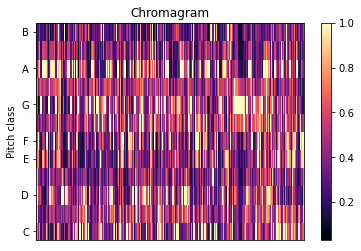

In [51]:
C_chroma = librosa.feature.chroma_cqt(y=samples, sr=sr)
librosa.display.specshow(C_chroma, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')

### Chrommagramme with beat synchronous

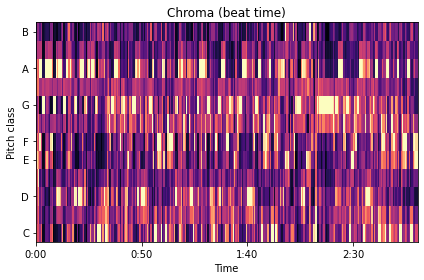

In [52]:
tempo, beat_f = librosa.beat.beat_track(y=samples, sr=sr, trim=False)
beat_f = librosa.util.fix_frames(beat_f, x_max=C.shape[1])
Csync = librosa.util.sync(C_chroma, beat_f, aggregate=np.median)
beat_t = librosa.frames_to_time(beat_f, sr=sr)
librosa.display.specshow(Csync, y_axis='chroma', x_axis='time',x_coords=beat_t)
plt.title('Chroma (beat time)')
plt.tight_layout()
plt.show()